# On the last episode, we covered...

* Type I and Type II Errors
* Effect Size
* Using scipy.stats to run TTests
* Interpreting a p-value

# Today
**YWBAT**
* Explain the relationship between effect size and power
* Interpret power on a given hypothesis test

# Let's look at a scenario where we have a control group and an experimental group

In [149]:
import numpy as np
import pandas as pd
np.random.seed(42)
df = pd.read_csv("power_data.csv")
df.head()

,q1_control,q1_experimental,q2_control,q2_experimental,q3_control,q3_experimental
0,20.640567,25.210719,25.703572,23.090863,56.546026,55.999113
1,21.847046,20.797593,19.818018,19.998542,59.875186,58.884652
2,24.541426,21.598802,17.874780,24.519374,60.072067,67.404292
3,19.121475,18.450466,15.458857,22.108927,61.890521,65.544765
4,17.087618,22.344364,14.590581,20.678094,54.532567,61.749442


# Let's plot these against each other

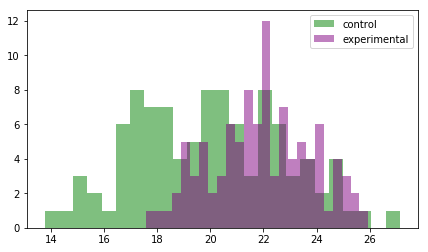

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.hist(df['q1_control'], bins=25, color='g', alpha=0.5, label='control')
plt.hist(df['q1_experimental'], bins=25, color='purple', alpha=0.5, label='experimental')
plt.legend()
plt.show()

# Hypothesis Testing - Independent TTest
* H0: mu_control = mu_experimental
* HA: mu_control != mu_experimental
* alpha = 0.05

In [51]:
import scipy.stats as stats

stats.ttest_ind(df['q1_control'], df['q1_experimental'])

Ttest_indResult(statistic=-5.857512205275946, pvalue=1.9305718945997362e-08)

In [52]:
# let's calculate effect size
from numpy import mean, sqrt, std

def cohens_d_one_samp(x, mu0):
    return (x.mean() - mu0) / x.std()


def cohens_d_two_samp(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

In [53]:
effect_size = cohens_d_two_samp(df['q1_experimental'], df['q1_control'])
effect_size

0.828377320246718

### This is well and good...
but the problem is, this isn't scaled across all problems and distributions. Because of this we need **Power**.  

**Power** is equivalent to  `1 - Type II Error rate` and it's scaled across all problems. Which is great for interpretation. 


# Import 

In [54]:
from statsmodels.stats.power import tt_ind_solve_power

help(tt_ind_solve_power)

Help on method solve_power in module statsmodels.stats.power:

solve_power(effect_size=None, nobs1=None, alpha=None, power=None, ratio=1.0, alternative='two-sided') method of statsmodels.stats.power.TTestIndPower instance
    solve for any one parameter of the power of a two sample t-test
    
    for t-test the keywords are:
        effect_size, nobs1, alpha, power, ratio
    
    exactly one needs to be ``None``, all others need numeric values
    
    Parameters
    ----------
    effect_size : float
        standardized effect size, difference between the two means divided
        by the standard deviation. `effect_size` has to be positive.
    nobs1 : int or float
        number of observations of sample 1. The number of observations of
        sample two is ratio times the size of sample 1,
        i.e. ``nobs2 = nobs1 * ratio``
    alpha : float in interval (0,1)
        significance level, e.g. 0.05, is the probability of a type I
        error, that is wrong rejections if the 

### Preparing variables for power analysis

In [55]:
effect_size, nobs1, alpha = effect_size, df['q1_control'].shape[0], 0.05

In [56]:
tt_ind_solve_power(effect_size=effect_size, nobs1=nobs, alpha=0.05)

# Since power = 1.0 our type_ii_error_rate = 0.0

1.0

# Power Discussion


### q1 Summary
- Hypothesis Test
    * Reject the null hypothesis
    * This means that the means between our two groups is different
- Effect Size
    * The effect size ~ 0.8 which means that there is a large effect on the mean outcome of the experimental group. 
- Power Analysis
    * After our power analysis, we're almost 100% certain that we will fail to reject to our null hypothesis when we need to. 

# Activity

Conduct a power analysis for the given problems, write a summary. 

Use the columns from the dataframe `df` above

In [152]:
df.head()

,q1_control,q1_experimental,q2_control,q2_experimental,q3_control,q3_experimental
0,20.640567,25.210719,25.703572,23.090863,56.546026,55.999113
1,21.847046,20.797593,19.818018,19.998542,59.875186,58.884652
2,24.541426,21.598802,17.874780,24.519374,60.072067,67.404292
3,19.121475,18.450466,15.458857,22.108927,61.890521,65.544765
4,17.087618,22.344364,14.590581,20.678094,54.532567,61.749442


## q2

An experiment was run to determine if adding a button will increase engagemnent on the Facebook timeline.  Please conduct the proper test, effect size and power analysis to determine if there is an effect. 

In [ ]:
# Work goes here

## q3

In [ ]:
# Work goes here

## Repeat q3...
But this time for your two groups, take a random sample of 30 individuals from each group. The control group is completed for you. 

In [151]:
control_samp = np.random.choice(df['q3_control'], replace=False, size=30)
experimental_samp = None

In [ ]:
# work goes here

# Discussion Questions

1. What did you notice as you calculated power across these 3 problems? 

2. What did you notice from q3 to Repeat q3? Did the results change at all? Why do you think they did or did not? 